## Contents
#### 1. Import libraries and cleaned data
#### 2. Data cleaning 
#### 3. Data exploration
#### 4. Hypotheses 
#### 5. Reshaping variables
#### 6. Split the data 
#### 7. Linear regression 
#### 8. Plot 
#### 9. Result interpretation
#### 10. Model performance
#### 11. Compareing predicted values with actual values
#### 12. Training set
#### 13. Additional thoughts

## 1. Importing libraries and data

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
path = r'C:\Users\Christian\Desktop\Mein Ordner\CF\Data Immersion\Achievement6\Achievement6-Project\Data\Prepared Data'

In [120]:
df = pd.read_pickle(os.path.join(path, 'Air_Traffic_Cargo_Statistics_cleaned.pkl'))

In [121]:
df.head()

,Activity Period,Activity Period Start Date,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS,last_update,upload_date
0,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,349048,158.328173,20-11-2023 07:01,20-11-2023 07:02
1,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,122003,55.340561,20-11-2023 07:01,20-11-2023 07:02
2,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,514450,233.354520,20-11-2023 07:01,20-11-2023 07:02
3,199907,01-07-1999,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Mail,Passenger,89776,40.722394,20-11-2023 07:01,20-11-2023 07:02
4,199907,01-07-1999,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Cargo,Passenger,13086,5.935810,20-11-2023 07:01,20-11-2023 07:02


## 2. Cleaning Data

The check for missing values, outliers and duplicates was already done in previous exercises. The dataset is the same so there is 
no need to do it again.

The only thing to do here is changing the data type of Activity Period into int64 for data exploration.

In [26]:
df['Activity Period'] =  df['Activity Period'].astype('int64')

In [27]:
df.dtypes

Activity Period                  int64
Activity Period Start Date      object
Operating Airline               object
Operating Airline IATA Code     object
Published Airline               object
Published Airline IATA Code     object
GEO Summary                     object
GEO Region                      object
Activity Type Code              object
Cargo Type Code                 object
Cargo Aircraft Type             object
Cargo Weight LBS                 int64
Cargo Metric TONS              float64
last_update                     object
upload_date                     object
dtype: object

In [122]:
dups = df.duplicated()
dups.shape

(53872,)

In [123]:

df.isnull().sum()

Activity Period                  0
Activity Period Start Date       0
Operating Airline                0
Operating Airline IATA Code    578
Published Airline                0
Published Airline IATA Code    578
GEO Summary                      0
GEO Region                       0
Activity Type Code               0
Cargo Type Code                  0
Cargo Aircraft Type              0
Cargo Weight LBS                 0
Cargo Metric TONS                0
last_update                      0
upload_date                      0
dtype: int64

In [124]:
df.describe()

,Cargo Weight LBS,Cargo Metric TONS
count,5.387200e+04,53872.000000
mean,5.192588e+05,235.535784
std,1.013786e+06,459.853292
min,1.000000e+00,0.000454
25%,1.964350e+04,8.910292
50%,1.443325e+05,65.469222
75%,5.918928e+05,268.482551
max,2.381234e+07,10801.278330


## 3. Explore your data visually 

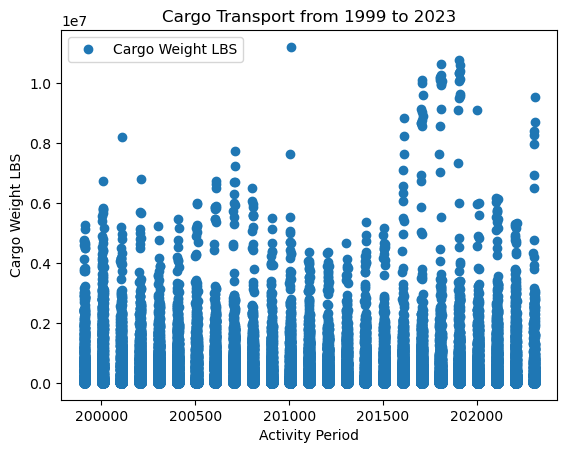

In [48]:
# Create a scatterplot 

df_int.plot(x = 'Activity Period', y='Cargo Weight LBS',style='o') 
plt.title('Cargo Transport from 1999 to 2023')  
plt.xlabel('Activity Period')  
plt.ylabel('Cargo Weight LBS')  
plt.show()

## 4. State your hypothesis

Hypotheses:

Due to globalisation I expect that international cargo transport has grown from 1999 to 2023. I assume a linear growth and therefore linear regression 
will be applied.

## 5. Reshape the variables into NumPy arrays

In [28]:
# create a subset with only international cargo transport
df_int = df[df['GEO Summary'] == 'International']

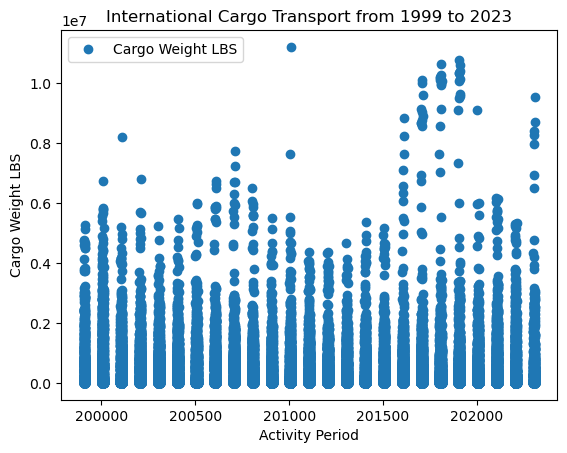

In [29]:
# Create a scatterplot 

df_int.plot(x = 'Activity Period', y='Cargo Weight LBS',style='o') 
plt.title('International Cargo Transport from 1999 to 2023')  
plt.xlabel('Activity Period')  
plt.ylabel('Cargo Weight LBS')  
plt.show()

In [30]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_int['Activity Period'].values.reshape(-1,1)
y = df_int['Cargo Weight LBS'].values.reshape(-1,1)

In [31]:
X

array([[199907],
       [199907],
       [199907],
       ...,
       [202309],
       [202309],
       [202309]], dtype=int64)

In [32]:
y

array([[ 13086],
       [  1161],
       [224248],
       ...,
       [212137],
       [196029],
       [489440]], dtype=int64)

## 6. Split the data into two sets

In [33]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Run a linear regression on the data

### First, fit the model you created to the training set

In [34]:
# Create a regression object.

regression = LinearRegression()

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

### Create a prediction for y on the test set

In [36]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 8. Create a plot that shows the regression line on the test set

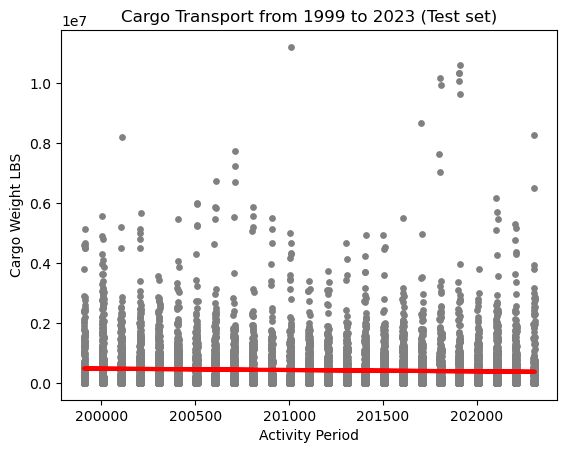

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cargo Transport from 1999 to 2023 (Test set)')
plot_test.xlabel('Activity Period')
plot_test.ylabel('Cargo Weight LBS')
plot_test.show()

## 9. Write your own interpretation of how well the line appears to fit the data 

The line doesn't fit the data at all. The line is a constant or even slightly decreasing. This is because every data points displays the weight of a particular cargo being transported.
Most of the cargo is light weight cargo and there are only few heavy weight cargos. That's why most data points are at the bottom. These point are fitted by the line.

## 10. Check the model performance statistics—MSE and R2 score

In [38]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-44.99688647]]
Mean squared error:  555267577540.6982
R2 score:  0.0022422231801561


The slope shows a slightly decreasing rate.

The Mean squared error is huge and the R2 is very small which means that the regression line is far from beeing an accurate representation of the data.

## 11. Compare the predicted y values with the actual y values in a dataframe

In [40]:
y_predicted

array([[439810.88329129],
       [443860.60307354],
       [381314.93088094],
       ...,
       [444220.5781653 ],
       [435131.20709846],
       [434861.22577964]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,175969,439810.883291
1,1531302,443860.603074
2,86228,381314.930881
3,1958,412632.763864
4,1482942,444175.581279
5,1433267,389864.339310
6,19326,412362.782545
7,29852,389954.333083
8,19634,426356.814237
9,38139,443905.599960


The predicted y values are far away from the actual values.

## 12. Performing same steps on trainig set 

In [42]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-44.99688647]]
Mean squared error:  546624477265.4231
R2 score:  0.0017803850977790026


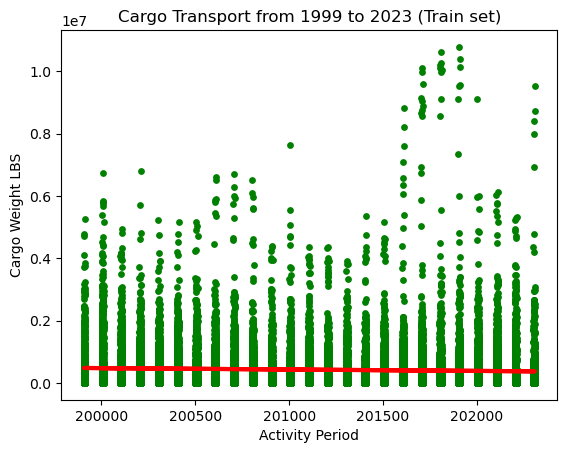

In [45]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cargo Transport from 1999 to 2023 (Train set)')
plot_test.xlabel('Activity Period')
plot_test.ylabel('Cargo Weight LBS')
plot_test.show()

In [85]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(30)

,Actual,Predicted
0,9045,475808.392467
1,10137,466539.033854
2,355,394544.015503
3,1638017,412812.751410
4,69079,439495.905086
5,52976,475808.392467
6,29703,421857.125590
7,114467,390044.326856
8,761016,389954.333083
9,7314,407998.084557


The results for the trainig set are similar. The linear regression performs equally bad.

## 13. Include your thoughts on how well the model performed on the test set 

The model perfrormace was very bad. The line is far from fitting all points and the Mean squared error is huge. 
The only conclusion is that a linear model is not suitable for predicting the development of cargo transport by airplanes.

### Include any reflections you have on the impact of possible data bias

In [ ]:
The dataset may not capture all air cargo operations globally, as it relies on voluntary reporting from airlines and other entities. 
Some regions or smaller carriers may be underrepresented. But in this case it probably wouldn't make any difference because the model itself 
is not suitable.

### Additional thoughts and conclusions

##### Let's rerun all the steps with with the sum of Cargo Weight LBS

In [101]:
df_m = df_int.groupby(['Activity Period']).agg({'Cargo Weight LBS' : ['sum']})
df_m.reset_index(inplace=True)

,Activity Period,Cargo Weight LBS
,,sum
0,199907,74034795
1,199908,72742049
2,199909,74787142
3,199910,75437840
4,199911,75211046


In [104]:
df_m.columns = ['Activity Period', 'SUM Cargo Weight LBS']
df_m.head()

,Activity Period,SUM Cargo Weight LBS
0,199907,74034795
1,199908,72742049
2,199909,74787142
3,199910,75437840
4,199911,75211046


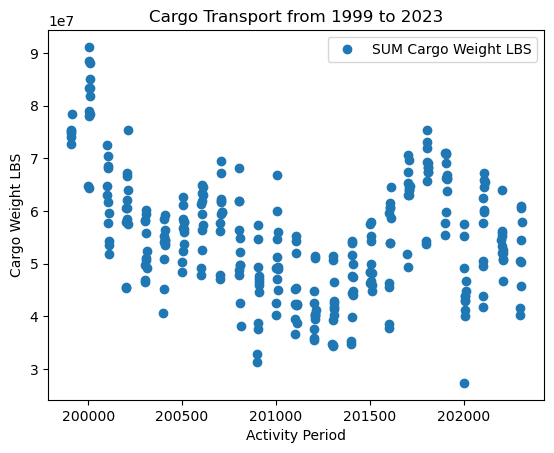

In [105]:
df_m.plot(x = 'Activity Period', y='SUM Cargo Weight LBS',style='o') 
plt.title('Cargo Transport from 1999 to 2023')  
plt.xlabel('Activity Period')  
plt.ylabel('Cargo Weight LBS')  
plt.show()

In [107]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X2 = df_m['Activity Period'].values.reshape(-1,1)
y2 = df_m['SUM Cargo Weight LBS'].values.reshape(-1,1)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [109]:
regression = LinearRegression() 
regression.fit(X_train, y_train)
y_predicted = regression.predict(X_test)

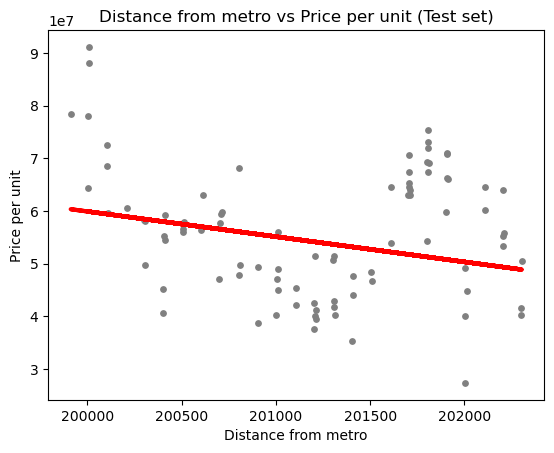

In [111]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cargo Transport from 1999 to 2023 (Test set)')
plot_test.xlabel('Activity Period')
plot_test.ylabel('Cargo Weight LBS')
plot_test.show()

In [112]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [113]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4788.56956911]]
Mean squared error:  150968995705492.16
R2 score:  -0.006448114922165571


In [114]:
y_predicted_train = regression.predict(X_train) 

In [115]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [116]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-4788.56956911]]
Mean squared error:  107268519516781.14
R2 score:  0.09600940136091674


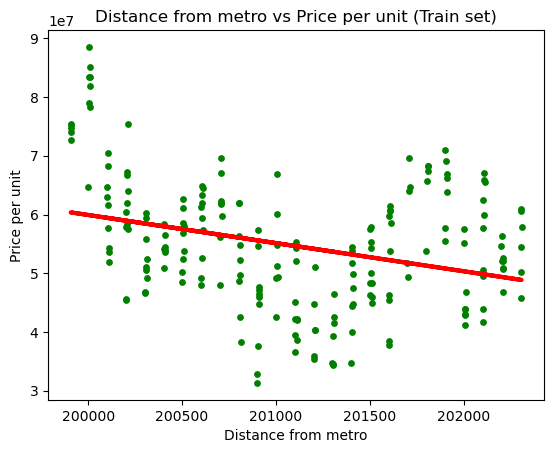

In [117]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cargo Transport from 1999 to 2023 (Train set)')
plot_test.xlabel('Activity Period')
plot_test.ylabel('Cargo Weight LBS')
plot_test.show()

### Final conclusions

In [ ]:
After reruning all the steps for aggregated Cargo weight the linear model is still far away from optimal performance.

Nevertheless the modell shows a decreasing tendency in Cargo weight which is the opposite of my inintial assumption. The only 
explanation is that there has been a shift towards cargo ships. Therefore we can assume that in near future cargo transport by airplanes
will decrease even though the model is completely unsuitable for predicting exact cargo weight transported by airplanes.